In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
default = pd.read_csv("datasets/defaulter.csv")

In [4]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   defaulter  10000 non-null  object 
 1   student    10000 non-null  object 
 2   balance    10000 non-null  float64
 3   income     10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


Text(0, 0.5, 'defaulter')

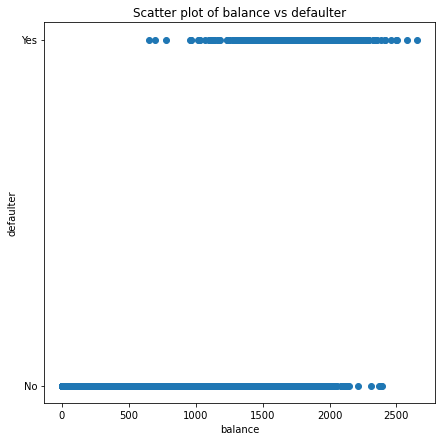

In [5]:
plt.figure(figsize=(7,7))
plt.scatter("balance","defaulter", data = default)
plt.title("Scatter plot of balance vs defaulter")
plt.xlabel("balance")
plt.ylabel("defaulter")

In [6]:
np.random.seed(113)
features = default[["balance"]]
target = default["defaulter"]

In [7]:
from sklearn.model_selection import train_test_split
# Splitting into training and testing data
features_train, features_test, target_train,target_test = train_test_split(features,target, test_size = 0.25)

In [8]:
features_train.shape, features_test.shape

((7500, 1), (2500, 1))

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features_train, target_train)

LogisticRegression()

In [10]:
print("Intercept:", model.intercept_,"\nCoefficients", model.coef_)

Intercept: [-10.50340662] 
Coefficients [[0.00541381]]


In [11]:
train_accuracy = model.score(features_train, target_train)
test_accuracy = model.score(features_test, target_test)
print(train_accuracy, test_accuracy)

0.9716 0.9756


In [12]:
target_pred = model.predict(features_test)
target_pred[target_pred=="No"].shape

(2469,)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
test_conf_matrix = confusion_matrix(target_test,target_pred)
pd.DataFrame(test_conf_matrix ,columns = model.classes_,index = model.classes_)

,No,Yes
No,2415,7
Yes,54,24


In [15]:
test_correct_predictions = test_conf_matrix[0][0] + test_conf_matrix[1][1]
test_total_predictions  = test_conf_matrix.sum()
test_accuracy = test_correct_predictions / test_total_predictions
print(test_accuracy)

0.9756
